In [1]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [2]:
# Study data files
mouse_metadata = "Resources/Mouse_metadata.csv"
study_results = "Resources/Study_results.csv"

In [3]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

In [4]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [6]:
data_merged = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])
data_merged.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each Regimen
tumor_vol = data_merged['Tumor Volume (mm3)']
tumor_mean = np.mean(tumor_vol)
tumor_median = np.median(tumor_vol)
tumor_var = np.var(tumor_vol, ddof =0)
tumor_stdev = np.std(tumor_vol, ddof =0)
#tumor_SEM = np.SEM(tumor_vol, ddof =0)
print(tumor_median)
print(tumor_mean)
print(tumor_var)
print(tumor_stdev)
#print(tumor_SEM)

48.95147442
50.448380631336505
79.07427999025809
8.892372011463426


In [8]:
tumor_median = np.median(tumor_vol)
tumor_median

48.95147442

In [9]:
tumor_mean

50.448380631336505

In [10]:
drug_regimen_group = data_merged.groupby("Drug Regimen")
drug_regimen_group.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
9,f993,0,45.0,0,Naftisol,Male,21,28
10,z234,0,45.0,0,Naftisol,Female,19,27
11,b559,0,45.0,0,Naftisol,Male,20,26
13,x930,0,45.0,0,Naftisol,Male,13,26


In [11]:
tumor_vol = drug_regimen_group['Tumor Volume (mm3)']
tumor_mean = (drug_regimen_group['Tumor Volume (mm3)'].mean())
#tumor_mean = np.mean(tumor_vol)
tumor_median = (drug_regimen_group['Tumor Volume (mm3)'].median())
tumor_var = (drug_regimen_group['Tumor Volume (mm3)'].var())
tumor_stdev = (drug_regimen_group['Tumor Volume (mm3)'].std())
tumor_sem = (drug_regimen_group['Tumor Volume (mm3)'].sem())
regimen_count = drug_regimen_group['Drug Regimen'].count()


In [12]:
drug_regimen_sum = pd.DataFrame(
            {"Tumor Vol_mean" : tumor_mean,
             "Tumor Vol_median" : tumor_median,
             "Tumor Vol_var" : tumor_var,
             "Tumor Vol_std dev" : tumor_stdev,
             "Tumor Vol_SEM" : tumor_sem,
             "Regimen Count": regimen_count}
)
drug_regimen_sum.head()

,Tumor Vol_mean,Tumor Vol_median,Tumor Vol_var,Tumor Vol_std dev,Tumor Vol_SEM,Regimen Count
Drug Regimen,,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346,230
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821,178
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236,178
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860,188
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466,186


In [13]:
print(drug_regimen_sum)

              Tumor Vol_mean  Tumor Vol_median  Tumor Vol_var  \
Drug Regimen                                                    
Capomulin          40.675741         41.557809      24.947764   
Ceftamin           52.591172         51.776157      39.290177   
Infubinol          52.884795         51.820584      43.128684   
Ketapril           55.235638         53.698743      68.553577   
Naftisol           54.331565         52.509285      66.173479   
Placebo            54.033581         52.288934      61.168083   
Propriva           52.322552         50.854632      42.351070   
Ramicane           40.216745         40.673236      23.486704   
Stelasyn           54.233149         52.431737      59.450562   
Zoniferol          53.236507         51.818479      48.533355   

              Tumor Vol_std dev  Tumor Vol_SEM  Regimen Count  
Drug Regimen                                                   
Capomulin              4.994774       0.329346            230  
Ceftamin               6.26

([<matplotlib.axis.XTick at 0x264f95b58c8>,
 <a list of 10 Text xticklabel objects>)

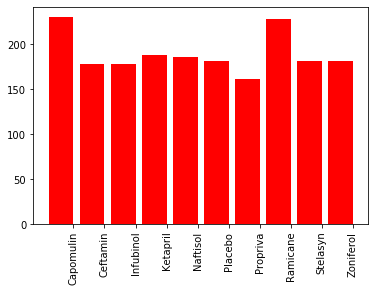

In [14]:
x_axis = np.arange(len(drug_regimen_sum))
xticks =["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
tick_locations = [value+0.4 for value in x_axis]
plt.bar(x_axis, drug_regimen_sum["Regimen Count"], color ='r')
plt.xticks(tick_locations, xticks, rotation = 'vertical')


In [15]:
print(regimen_count)

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Drug Regimen, dtype: int64


In [16]:
x_axis = len(regimen_count)

Text(0, 0.5, '# of treatments')

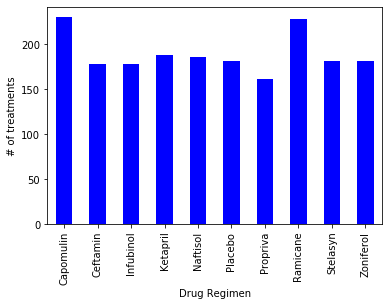

In [17]:
ax = regimen_count.plot(kind="bar", color = 'b')
ax.set_ylabel("# of treatments")

In [18]:
gender_group = data_merged.groupby("Sex")
#drug_regimen_group.head()
gender_count = gender_group['Sex'].count()
print(gender_count)

Sex
Female    935
Male      958
Name: Sex, dtype: int64


In [19]:
gender = ['Female', 'Male']
colors = ['red', 'blue']
explode = [0.1,0]

([<matplotlib.patches.Wedge at 0x264f97a0788>,
 [Text(0.02290091287918425, 1.1997814585120492, 'Female'),
  Text(-0.020992503472586185, -1.0997996703027118, 'Male')],
 [Text(0.01335886584619081, 0.699872517465362, '49.4%'),
  Text(-0.011450456439592464, -0.5998907292560246, '50.6%')])

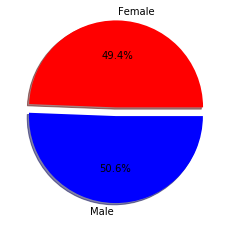

In [20]:
plt.pie(gender_count,labels=gender, explode=explode, colors=colors,
        autopct="%1.1f%%", shadow=True)#, startangle=140)

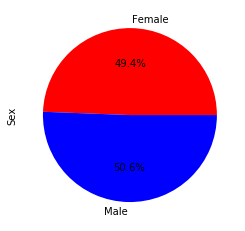

In [21]:
# mouse by gender pie chart using pandas
gender_count.plot.pie(colors=['r','b'], autopct='%.1f%%')   


In [22]:
mouse_gp = study_results.groupby("Mouse ID")
mouse_gp.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1107,x401,20,36.065835,0
1108,m269,20,61.145866,0
1109,a963,20,51.463734,0
1110,p189,20,56.530204,3


In [23]:
sresults_sorted = data_merged .sort_values(by=['Mouse ID', 'Timepoint'])
print(sresults_sorted)

     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
113      a203          0           45.000000                 0    Infubinol   
389      a203          5           48.508468                 0    Infubinol   
598      a203         10           51.852437                 1    Infubinol   
758      a203         15           52.777870                 1    Infubinol   
1018     a203         20           55.173336                 1    Infubinol   
...       ...        ...                 ...               ...          ...   
1143     z969         25           63.145652                 2     Naftisol   
1407     z969         30           65.841013                 3     Naftisol   
1529     z969         35           69.176246                 4     Naftisol   
1730     z969         40           70.314904                 4     Naftisol   
1869     z969         45           73.867845                 4     Naftisol   

         Sex  Age_months  Weight (g)  
113   Female

In [48]:
df=sresults_sorted.groupby("Mouse ID").tail(1)

In [53]:
df1 = pd.DataFrame(df, columns = ['Mouse ID','Tumor Volume (mm3)', 'Drug Regimen'])
cap_df = df1[df1['Drug Regimen'] == 'Capomulin']
print(cap_df)

     Mouse ID  Tumor Volume (mm3) Drug Regimen
1764     b128           38.982878    Capomulin
1829     b742           38.939633    Capomulin
930      f966           30.485985    Capomulin
1777     g288           37.074024    Capomulin
1791     g316           40.159220    Capomulin
1878     i557           47.685963    Capomulin
1850     i738           37.311846    Capomulin
1859     j119           38.125164    Capomulin
1497     j246           38.753265    Capomulin
1771     l509           41.483008    Capomulin
1817     l897           38.846876    Capomulin
1843     m601           28.430964    Capomulin
1800     m957           33.329098    Capomulin
801      r157           46.539206    Capomulin
1788     r554           32.377357    Capomulin
1888     r944           41.581521    Capomulin
1849     s185           23.343598    Capomulin
1854     s710           40.728578    Capomulin
1769     t565           34.455298    Capomulin
1889     u364           31.023923    Capomulin
1821     v923

In [60]:
cap_vol = cap_df['Tumor Volume (mm3)']
cap_qtr = cap_vol.quantile([.25, .5, .75]) 
cap_low = cap_qtr[0.25]
cap_mid = cap_qtr[0.5]
cap_high = cap_qtr[0.75]
cap_iqr = cap_high - cap_low
print(cap_low)
print(cap_mid)
print(cap_high)
print(cap_iqr)

32.37735684
38.125164399999996
40.1592203
7.781863460000004


In [54]:
ram_df = df1[df1['Drug Regimen'] == 'Ramicane']
print(ram_df)

     Mouse ID  Tumor Volume (mm3) Drug Regimen
1773     a411           38.407618     Ramicane
1836     a444           43.047543     Ramicane
1857     a520           38.810366     Ramicane
1879     a644           32.978522     Ramicane
1352     c458           38.342008     Ramicane
1822     c758           33.397653     Ramicane
1844     d251           37.311236     Ramicane
1801     e662           40.659006     Ramicane
1870     g791           29.128472     Ramicane
1885     i177           33.562402     Ramicane
1780     i334           36.374510     Ramicane
1833     j913           31.560470     Ramicane
1828     j989           36.134852     Ramicane
1814     k403           22.050126     Ramicane
1808     m546           30.564625     Ramicane
1763     n364           31.095335     Ramicane
1776     q597           45.220869     Ramicane
1498     q610           36.561652     Ramicane
1874     r811           37.225650     Ramicane
1312     r921           43.419381     Ramicane
1795     s508

In [61]:
ram_vol = ram_df['Tumor Volume (mm3)']
ram_qtr = ram_vol.quantile([.25, .5, .75]) 
ram_low = ram_qtr[0.25]
ram_mid = ram_qtr[0.5]
ram_high = ram_qtr[0.75]
ram_iqr = ram_high - ram_low
print(ram_low)
print(ram_mid)
print(ram_high)
print(ram_iqr)

31.56046955
36.56165229
40.65900627
9.098536719999998


In [62]:
inf_df = df1[df1['Drug Regimen'] == 'Infubinol']
print(inf_df)

     Mouse ID  Tumor Volume (mm3) Drug Regimen
1804     a203           67.973419    Infubinol
1786     a251           65.525743    Infubinol
1371     a577           57.031862    Infubinol
1794     a685           66.083066    Infubinol
1781     c139           72.226731    Infubinol
420      c326           36.321346    Infubinol
1320     c895           60.969711    Infubinol
1802     e476           62.435404    Infubinol
1806     f345           60.918767    Infubinol
1735     i386           67.289621    Infubinol
1789     k483           66.196912    Infubinol
1485     k804           62.117279    Infubinol
449      m756           47.010364    Infubinol
1429     n671           60.165180    Infubinol
1469     o809           55.629428    Infubinol
450      o813           45.699331    Infubinol
1364     q132           54.656549    Infubinol
1236     s121           55.650681    Infubinol
427      v339           46.250112    Infubinol
991      v719           54.048608    Infubinol
796      v766

In [63]:
inf_vol = inf_df['Tumor Volume (mm3)']
inf_qtr = inf_vol.quantile([.25, .5, .75]) 
inf_low = inf_qtr[0.25]
inf_mid = inf_qtr[0.5]
inf_high = inf_qtr[0.75]
inf_iqr = inf_high - inf_low
print(inf_low)
print(inf_mid)
print(inf_high)
print(inf_iqr)

54.04860769
60.16518046
65.52574285
11.477135160000003


In [64]:
cef_df = df1[df1['Drug Regimen'] == 'Ceftamin']
print(cef_df)

     Mouse ID  Tumor Volume (mm3) Drug Regimen
1856     a275           62.999356     Ceftamin
194      b447           45.000000     Ceftamin
1150     b487           56.057749     Ceftamin
1405     b759           55.742829     Ceftamin
882      f436           48.722078     Ceftamin
463      h531           47.784682     Ceftamin
1772     j296           61.849023     Ceftamin
1858     k210           68.923185     Ceftamin
1810     l471           67.748662     Ceftamin
1435     l490           57.918381     Ceftamin
544      l558           46.784535     Ceftamin
1765     l661           59.851956     Ceftamin
1864     l733           64.299830     Ceftamin
1872     o287           59.741901     Ceftamin
1890     p438           61.433892     Ceftamin
1692     q483           64.192341     Ceftamin
222      t573           45.000000     Ceftamin
1113     u149           52.925348     Ceftamin
182      u153           45.000000     Ceftamin
1790     w151           67.527482     Ceftamin
217      x226

In [65]:
cef_vol = cef_df['Tumor Volume (mm3)']
cef_qtr = cef_vol.quantile([.25, .5, .75]) 
cef_low = cef_qtr[0.25]
cef_mid = cef_qtr[0.5]
cef_high = cef_qtr[0.75]
cef_iqr = cef_high - cef_low
print(cef_low)
print(cef_mid)
print(cef_high)
print(cef_iqr)

48.72207785
59.85195552
64.29983003
15.577752179999997


<function matplotlib.pyplot.show(*args, **kw)>

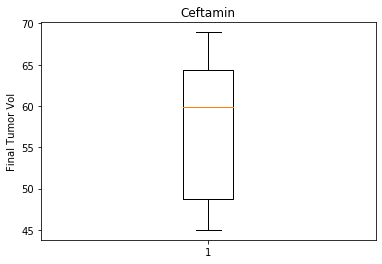

In [68]:
cef_vol = cef_df['Tumor Volume (mm3)']
fig1, ax1 = plt.subplots()
ax1.boxplot(cef_vol)
ax1.set_title('Ceftamin')
ax1.set_ylabel('Final Tumor Vol')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

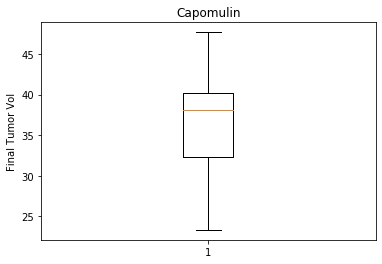

In [74]:
cap_vol = cap_df['Tumor Volume (mm3)']
fig2, ax2 = plt.subplots()
ax2.boxplot(cap_vol)
ax2.set_title('Capomulin')
ax2.set_ylabel('Final Tumor Vol')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

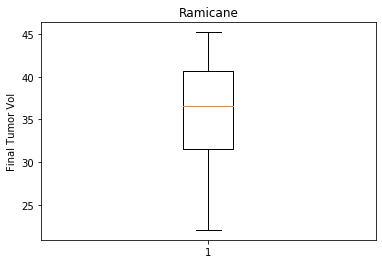

In [75]:
ram_vol = ram_df['Tumor Volume (mm3)']
fig3, ax3 = plt.subplots()
ax3.boxplot(ram_vol)
ax3.set_title('Ramicane')
ax3.set_ylabel('Final Tumor Vol')
plt.show

{'whiskers': [<matplotlib.lines.Line2D at 0x264f9d5bf48>,
 'caps': [<matplotlib.lines.Line2D at 0x264f9d89cc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x264f9d78248>],
 'medians': [<matplotlib.lines.Line2D at 0x264f9d8ec48>],
 'fliers': [<matplotlib.lines.Line2D at 0x264f9d91a88>],
 'means': []}

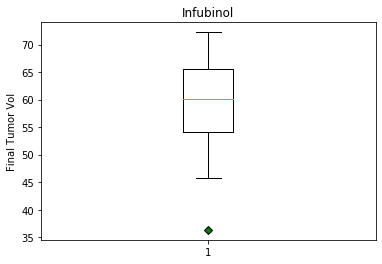

In [78]:
green_diamond = dict(markerfacecolor='g', marker='D')
inf_vol = inf_df['Tumor Volume (mm3)']
fig4, ax4 = plt.subplots()
#ax4.boxplot(inf_vol)
ax4.set_title('Infubinol')
ax4.set_ylabel('Final Tumor Vol')
ax4.boxplot(inf_vol, flierprops=green_diamond)
#plt.show